In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [91]:
deliveries = pd.read_csv("deliveries_updated_mens_ipl.csv")
matches = pd.read_csv("matches_updated_mens_ipl.csv")
ipl = pd.merge(deliveries,matches)


#Cleaning up the Season
ipl.season = ipl.season.apply(lambda x: "2010" if x=="2009/10" else x)
ipl.season = ipl.season.apply(lambda x: "2020" if x=="2020/21" else x)

In [92]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           243817 non-null  int64  
 1   inning            243817 non-null  int64  
 2   over_ball         243817 non-null  float64
 3   over              243817 non-null  int64  
 4   ball              243817 non-null  int64  
 5   batting_team      243817 non-null  object 
 6   bowling_team      243817 non-null  object 
 7   batsman           243817 non-null  object 
 8   non_striker       243817 non-null  object 
 9   bowler            243817 non-null  object 
 10  batsman_runs      243817 non-null  int64  
 11  extras            243817 non-null  int64  
 12  isWide            7652 non-null    float64
 13  isNoBall          1018 non-null    float64
 14  Byes              628 non-null     float64
 15  LegByes           3778 non-null    float64
 16  Penalty           2 

# 1. Best Finisher of All Time

In [93]:
# lets assume the death over as last 4 overs (16,17,18 and 19)

In [94]:
# Filtering deliveries only on death overs
deathOverMin = 16
deathOverDeliveries = ipl[ipl["over"]>=deathOverMin]

In [95]:
# Removing Wide and No Ball deliveries from the death over deliveries as they might mess up our answer
deathOverDeliveries = deathOverDeliveries[deathOverDeliveries["isWide"].isnull()]
deathOverDeliveries = deathOverDeliveries[deathOverDeliveries["isNoBall"].isnull()]

In [190]:
# lets find the top 10 Finishers of All Time

top10Finishers = pd.DataFrame(deathOverDeliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:10])
top10Finishers

,batsman_runs
batsman,
MS Dhoni,2606
KA Pollard,1682
AB de Villiers,1398
KD Karthik,1355
RA Jadeja,1291
RG Sharma,1134
HH Pandya,1074
V Kohli,1040
AD Russell,962


In [192]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='batsman_runs', data=top10Finishers, palette='mako')

plt.title('Top 10 Finishers and Their Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret input 'index'

<Figure size 1000x600 with 0 Axes>

In [152]:
# Who has been the best finisher for most number of seasons?

seasonsAndBatsmen = deathOverDeliveries.groupby(["season","batsman"])["batsman_runs"].sum().reset_index()
idx = seasonsAndBatsmen.groupby("season")["batsman_runs"].idxmax()
max_runs_per_season = seasonsAndBatsmen.loc[idx].sort_values(by="season").reset_index(drop=True)

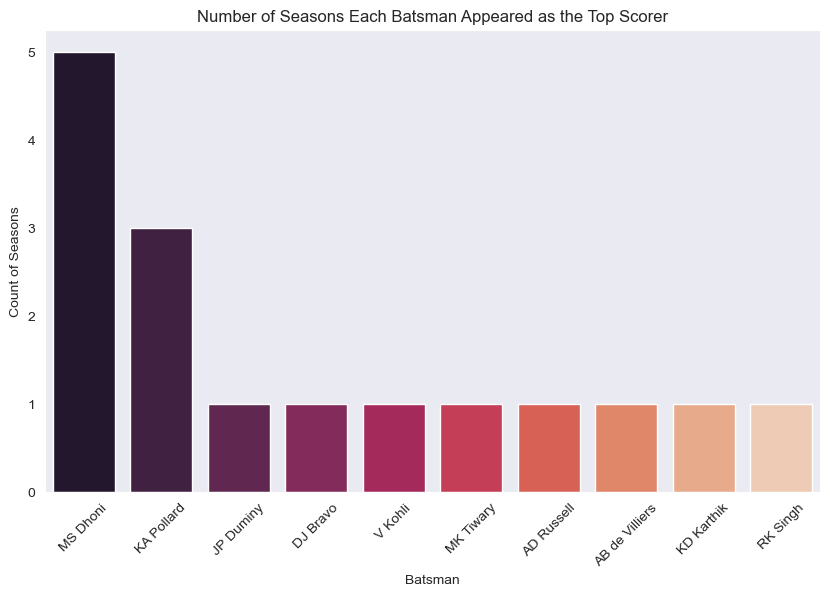

In [178]:


# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='batsman', palette="rocket", data=max_runs_per_season, order=max_runs_per_season['batsman'].value_counts().index)

plt.title('Number of Seasons Each Batsman Appeared as the Top Scorer')
plt.ylabel('Count of Seasons')
plt.xlabel('Batsman')
plt.xticks(rotation=45)
plt.show()